# Question - 01

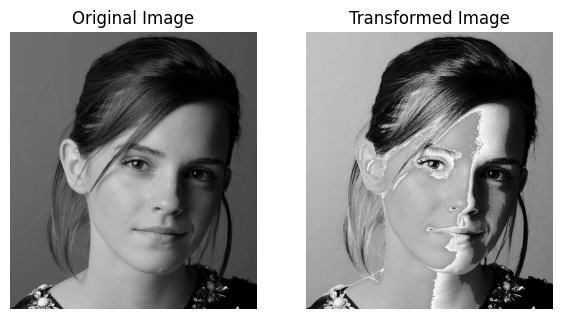

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io

# Load the grayscale image
image = io.imread('./a1images/a1images/emma.jpg', as_gray=True)

image_scaled = (image * 255).astype(np.uint8)

def transform_intensity(I_in):
    if I_in < 50:
        return I_in
    elif I_in < 150:
        return 100 + (255-100)/(100) * (I_in-50)
    else:
        return I_in

# Aply the transformation
transformed_image = np.vectorize(transform_intensity)(image_scaled)

# Ensure the output intensities are within [0, 255]
transformed_image = np.clip(transformed_image, 0, 255).astype(np.uint8)

transformed_image_rescaled = transformed_image / 255.0
input_intensities = np.arange(0, 255)

# Apply transformation
output_intensities = np.array([transform_intensity(i) for i in input_intensities])


# Display the original and transformed images
plt.figure(figsize=(7, 7))
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(transformed_image_rescaled, cmap='gray')
plt.title('Transformed Image')
plt.axis('off')

plt.show()


# Question - 02

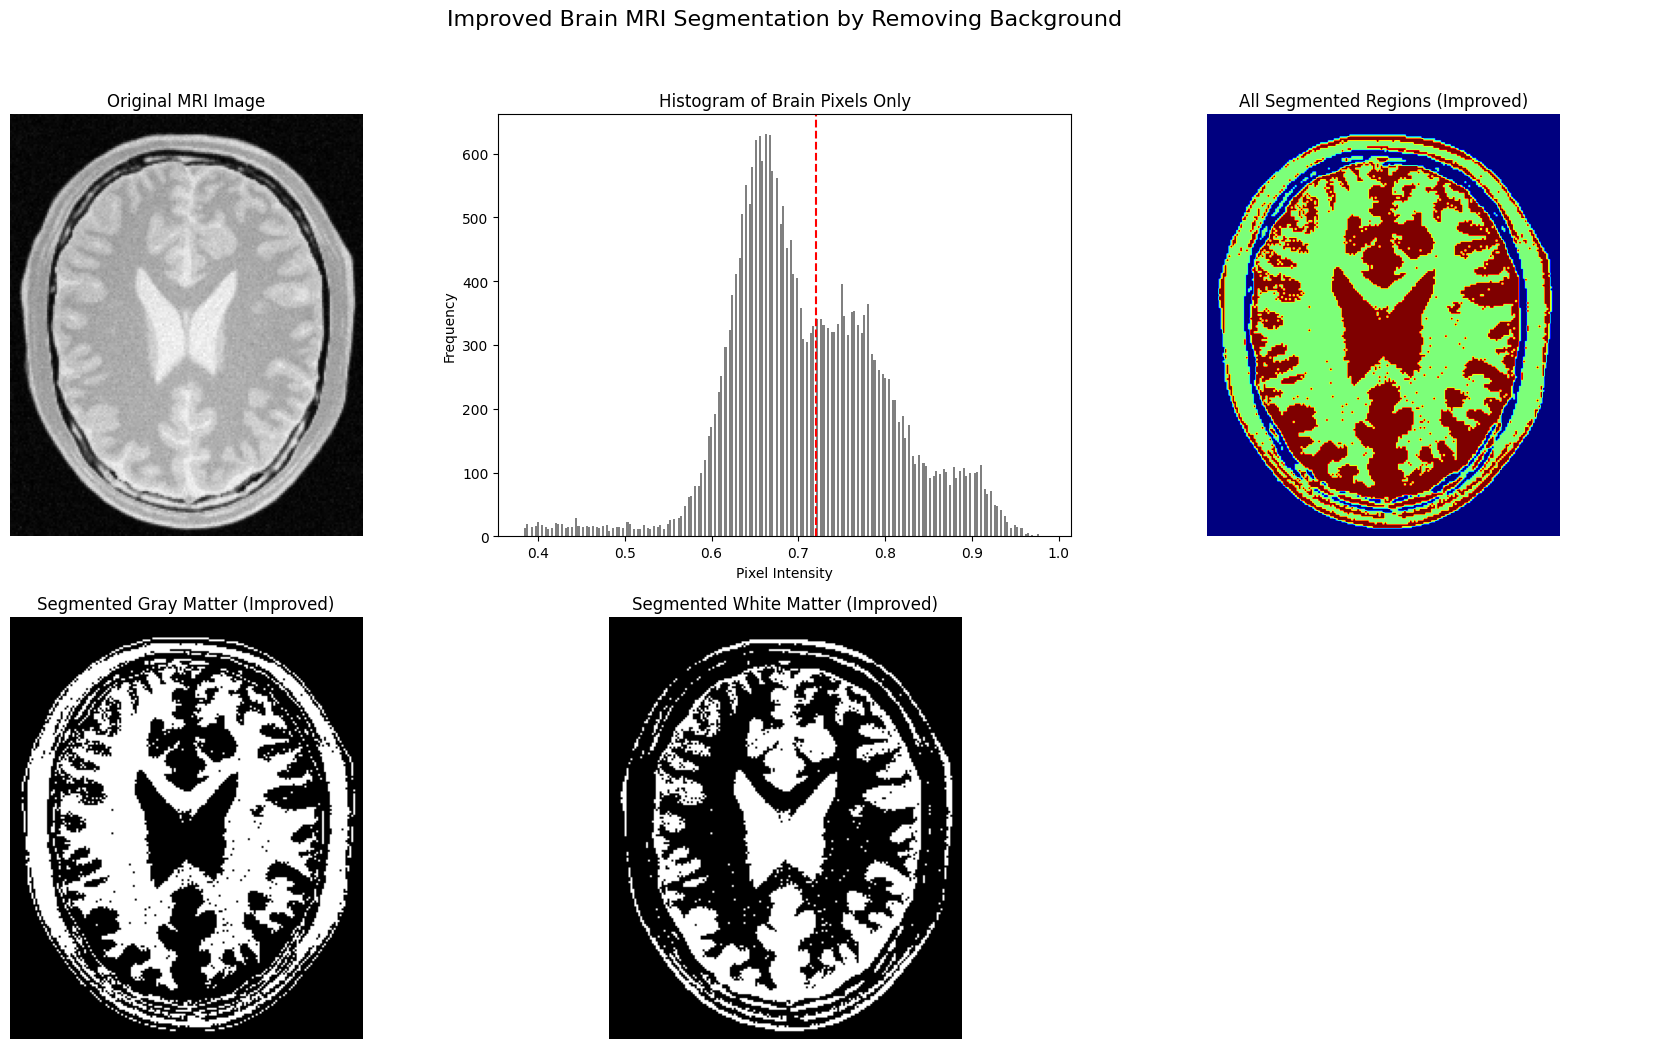

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io
from skimage.filters import threshold_multiotsu, threshold_otsu


image = io.imread('./a1images/a1images/brain_proton_density_slice.png', as_gray=True)

initial_thresh = threshold_otsu(image)
brain_mask = image > initial_thresh

brain_pixels = image[brain_mask]
brain_thresholds = threshold_multiotsu(brain_pixels, classes=2)

regions = np.digitize(brain_pixels, bins=brain_thresholds) + 1

final_segmentation = np.zeros_like(image, dtype=np.uint8)
final_segmentation[brain_mask] = regions

gray_matter_mask = (final_segmentation == 1)
white_matter_mask = (final_segmentation == 2)

fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(18, 11))

ax[0, 0].imshow(image, cmap='gray')
ax[0, 0].set_title('Original MRI Image')
ax[0, 0].axis('off')

ax[0, 1].hist(brain_pixels, bins=255, color='gray')
ax[0, 1].set_title('Histogram of Brain Pixels Only')
for thresh in brain_thresholds:
    ax[0, 1].axvline(thresh, color='r', linestyle='--')
ax[0, 1].set_xlabel('Pixel Intensity')
ax[0, 1].set_ylabel('Frequency')

ax[0, 2].imshow(final_segmentation, cmap='jet')
ax[0, 2].set_title('All Segmented Regions (Improved)')
ax[0, 2].axis('off')

ax[1, 0].imshow(gray_matter_mask, cmap='gray')
ax[1, 0].set_title('Segmented Gray Matter (Improved)')
ax[1, 0].axis('off')

ax[1, 1].imshow(white_matter_mask, cmap='gray')
ax[1, 1].set_title('Segmented White Matter (Improved)')
ax[1, 1].axis('off')

ax[1, 2].axis('off')

plt.suptitle('Improved Brain MRI Segmentation by Removing Background', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# Question - 03

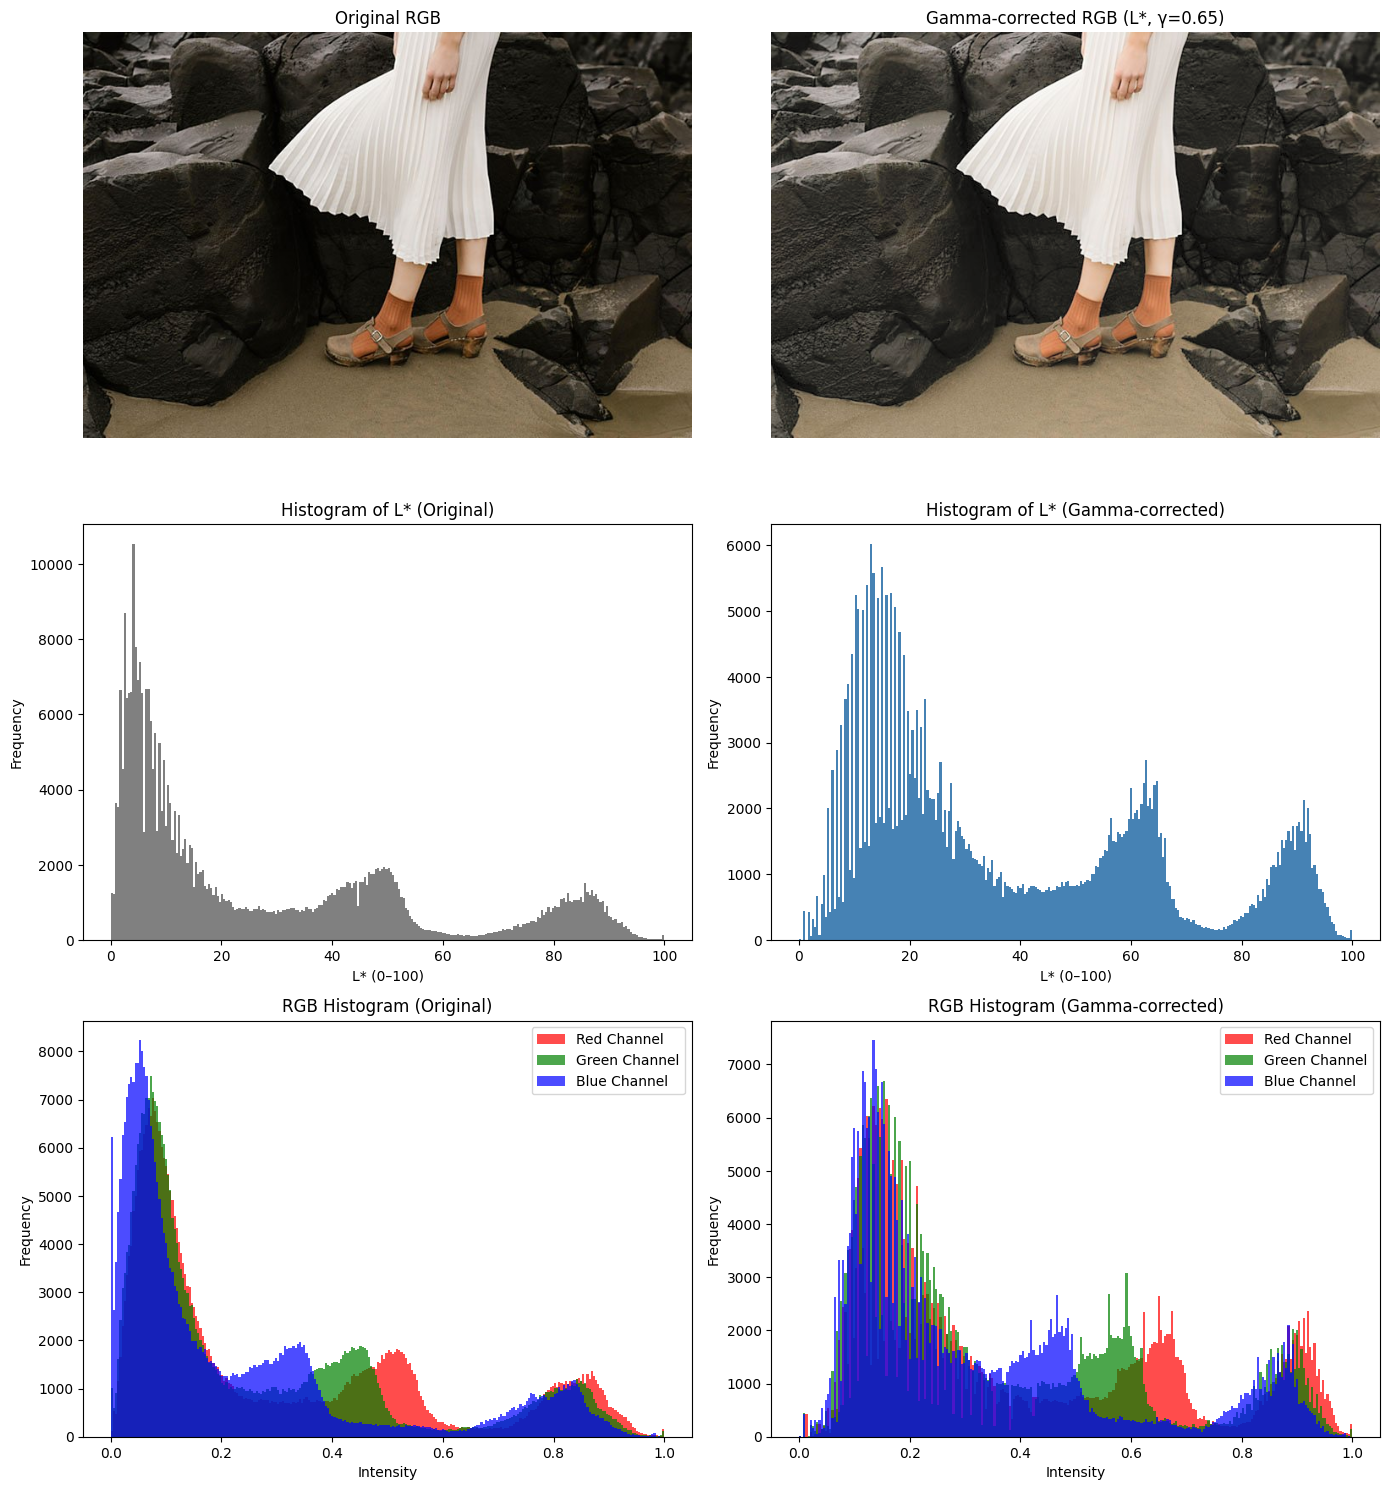

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, color
from skimage.util import img_as_float

image_rgb = io.imread('./a1images/a1images/highlights_and_shadows.jpg')
image_rgb = img_as_float(image_rgb)

# Convert to LAB
image_lab = color.rgb2lab(image_rgb)
L_original = image_lab[..., 0] 
a_channel = image_lab[..., 1]
b_channel = image_lab[..., 2]

# Gamma correction
gamma_value = 0.65
L_norm = np.clip(L_original / 100.0, 0.0, 1.0)
L_corrected = 100.0 * np.power(L_norm, gamma_value)

# Reconstruct
lab_corrected = np.dstack([L_corrected, a_channel, b_channel])
image_corrected_rgb = np.clip(color.lab2rgb(lab_corrected), 0.0, 1.0)

# Plotting
fig, axes = plt.subplots(3, 2, figsize=(14, 15))

axes[0, 0].imshow(image_rgb)
axes[0, 0].set_title('Original RGB')
axes[0, 0].axis('off')

axes[0, 1].imshow(image_corrected_rgb)
axes[0, 1].set_title(f'Gamma-corrected RGB (L*, γ={gamma_value})')
axes[0, 1].axis('off')

axes[1, 0].hist(L_original.ravel(), bins=256, range=(0, 100), color='gray')
axes[1, 0].set_title('Histogram of L* (Original)')
axes[1, 0].set_xlabel('L* (0–100)')
axes[1, 0].set_ylabel('Frequency')

axes[1, 1].hist(L_corrected.ravel(), bins=256, range=(0, 100), color='steelblue')
axes[1, 1].set_title('Histogram of L* (Gamma-corrected)')
axes[1, 1].set_xlabel('L* (0–100)')
axes[1, 1].set_ylabel('Frequency')

colors = ['red', 'green', 'blue']
for i, c in enumerate(colors):
    axes[2, 0].hist(image_rgb[..., i].ravel(), bins=256, color=c, alpha=0.7, label=f'{c.capitalize()} Channel')
axes[2, 0].set_title('RGB Histogram (Original)')
axes[2, 0].set_xlabel('Intensity')
axes[2, 0].set_ylabel('Frequency')
axes[2, 0].legend()

for i, c in enumerate(colors):
    axes[2, 1].hist(image_corrected_rgb[..., i].ravel(), bins=256, color=c, alpha=0.7, label=f'{c.capitalize()} Channel')
axes[2, 1].set_title('RGB Histogram (Gamma-corrected)')
axes[2, 1].set_xlabel('Intensity')
axes[2, 1].set_ylabel('Frequency')
axes[2, 1].legend()

plt.tight_layout()
plt.show()

# Question - 04

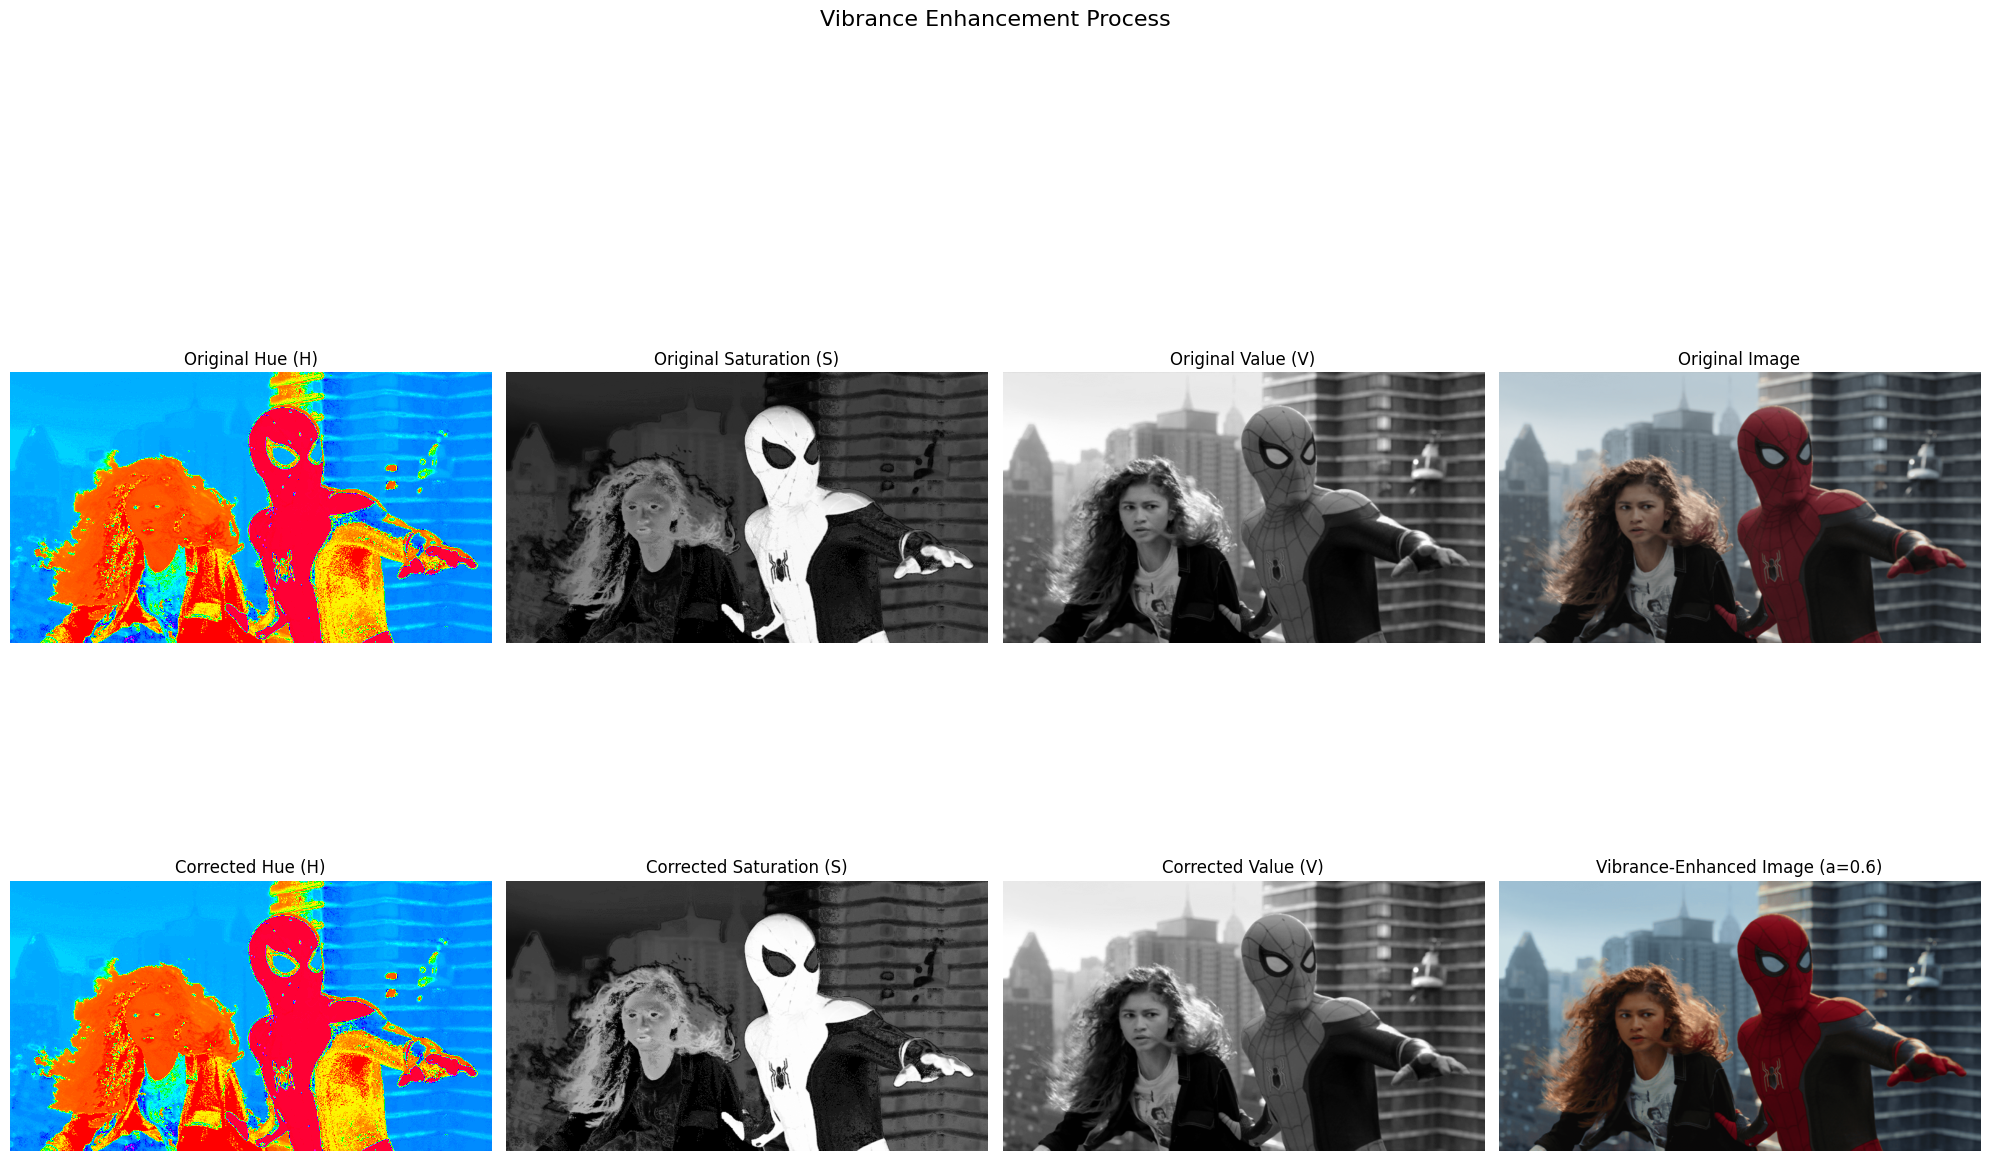

Chosen value of a: 0.6

Testing values of a:


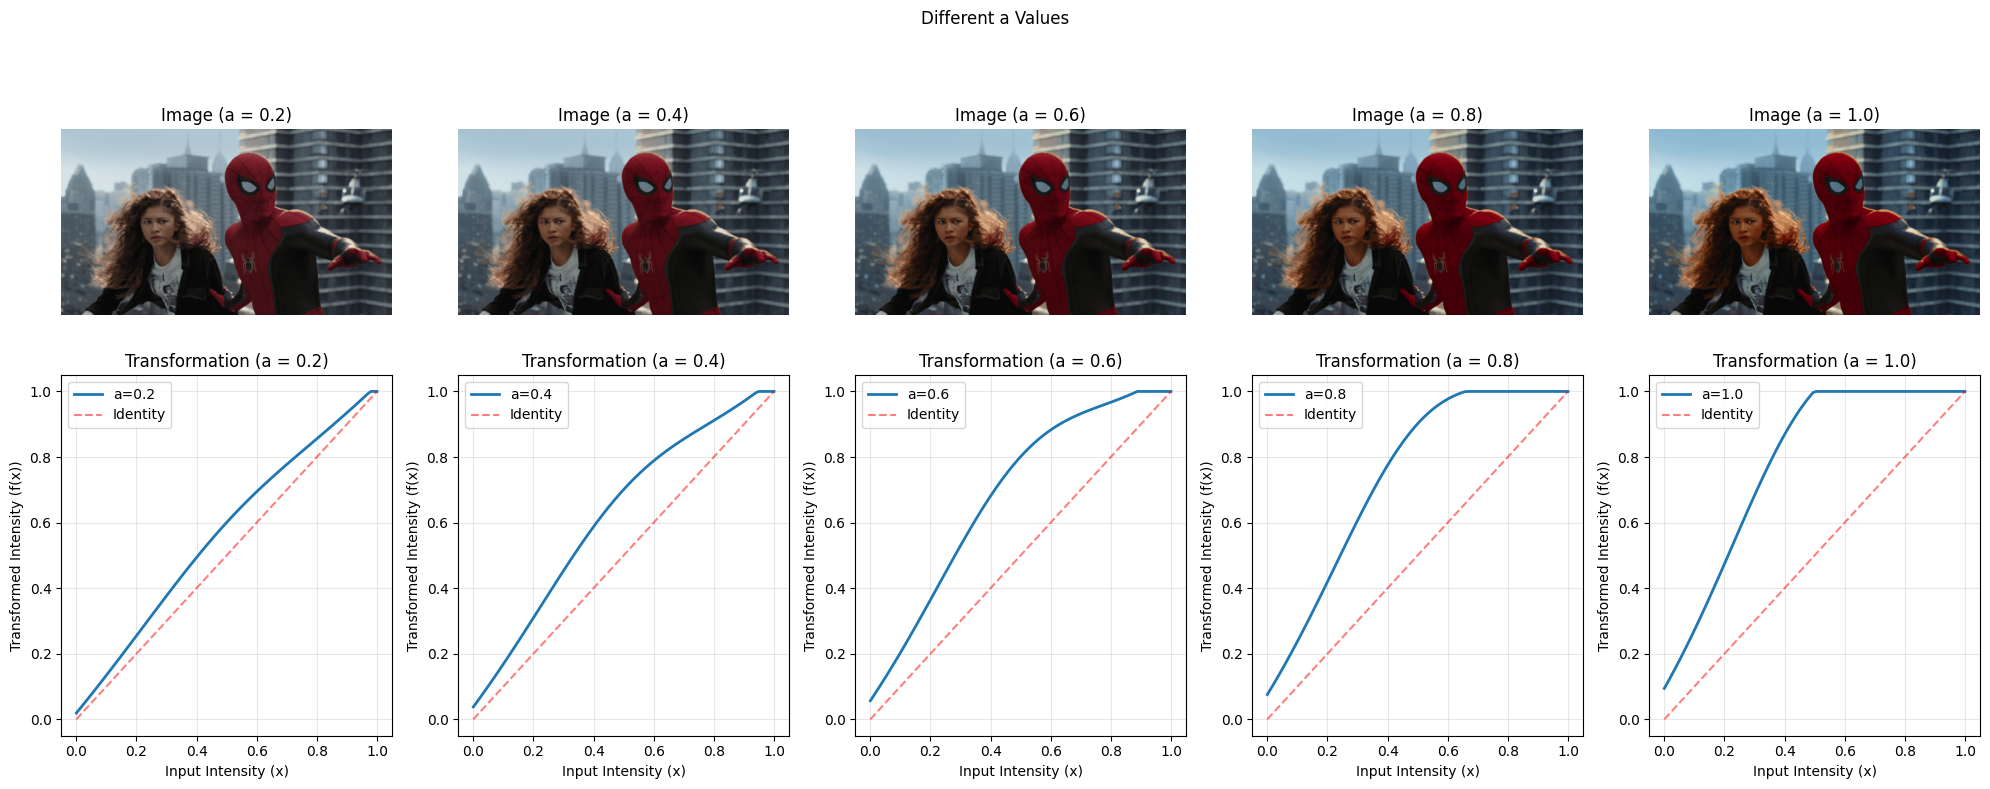

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, color
from skimage.util import img_as_float

image_rgb = io.imread('./a1images/a1images/spider.png')
image_rgb = img_as_float(image_rgb)

image_hsv = color.rgb2hsv(image_rgb)
H_original, S_original, V_original = image_hsv[..., 0], image_hsv[..., 1], image_hsv[..., 2]

def intensity_transformation(x, a, sigma=70):
    x_scaled = x * 255
    transformed = x_scaled + a * 128 * np.exp(-(x_scaled - 128)**2 / (2 * sigma**2))
    transformed = np.clip(transformed, 0, 255)
    return transformed / 255

a = 0.6



S_transformed = intensity_transformation(S_original, a)
image_hsv_transformed = np.dstack((H_original, S_transformed, V_original))
image_rgb_transformed = color.hsv2rgb(image_hsv_transformed)

H_corrected, S_corrected, V_corrected = image_hsv_transformed[..., 0], image_hsv_transformed[..., 1], image_hsv_transformed[..., 2]

fig = plt.figure(figsize=(20, 15))

plt.subplot(2, 4, 1)
plt.imshow(H_original, cmap='hsv', vmin=0, vmax=1)
plt.title('Original Hue (H)')
plt.axis('off')

plt.subplot(2, 4, 2)
plt.imshow(S_original, cmap='gray')
plt.title('Original Saturation (S)')
plt.axis('off')

plt.subplot(2, 4, 3)
plt.imshow(V_original, cmap='gray')
plt.title('Original Value (V)')
plt.axis('off')

plt.subplot(2, 4, 4)
plt.imshow(image_rgb)
plt.title('Original Image')
plt.axis('off')

plt.subplot(2, 4, 5)
plt.imshow(H_corrected, cmap='hsv', vmin=0, vmax=1)
plt.title('Corrected Hue (H)')
plt.axis('off')

plt.subplot(2, 4, 6)
plt.imshow(S_corrected, cmap='gray')
plt.title('Corrected Saturation (S)')
plt.axis('off')

plt.subplot(2, 4, 7)
plt.imshow(V_corrected, cmap='gray')
plt.title('Corrected Value (V)')
plt.axis('off')

plt.subplot(2, 4, 8)
plt.imshow(image_rgb_transformed)
plt.title(f'Vibrance-Enhanced Image (a={a})')
plt.axis('off')

plt.suptitle('Vibrance Enhancement Process', fontsize=16, y=0.98)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

print(f"Chosen value of a: {a}")

print("\nTesting values of a:")
test_a_values = [0.2, 0.4, 0.6, 0.8, 1.0]
fig, axes = plt.subplots(2, 5, figsize=(20, 8))

for i, test_a in enumerate(test_a_values):
    S_test = intensity_transformation(S_original, test_a)
    image_hsv_test = np.dstack((H_original, S_test, V_original))
    image_rgb_test = color.hsv2rgb(image_hsv_test)
    
    axes[0, i].imshow(image_rgb_test)
    axes[0, i].set_title(f'Image (a = {test_a})')
    axes[0, i].axis('off')

x_curve = np.linspace(0, 1, 100)
for i, test_a in enumerate(test_a_values):
    y_curve = intensity_transformation(x_curve, test_a)
    axes[1, i].plot(x_curve, y_curve, linewidth=2, label=f'a={test_a}')
    axes[1, i].plot([0, 1], [0, 1], 'r--', alpha=0.5, label='Identity')
    axes[1, i].set_title(f'Transformation (a = {test_a})')
    axes[1, i].set_xlabel('Input Intensity (x)')
    axes[1, i].set_ylabel('Transformed Intensity (f(x))')
    axes[1, i].legend()
    axes[1, i].grid(True, alpha=0.3)

plt.suptitle('Different a Values')
plt.tight_layout()
plt.show()

# Question - 05

Image data type: uint8
Image range: 13 to 83


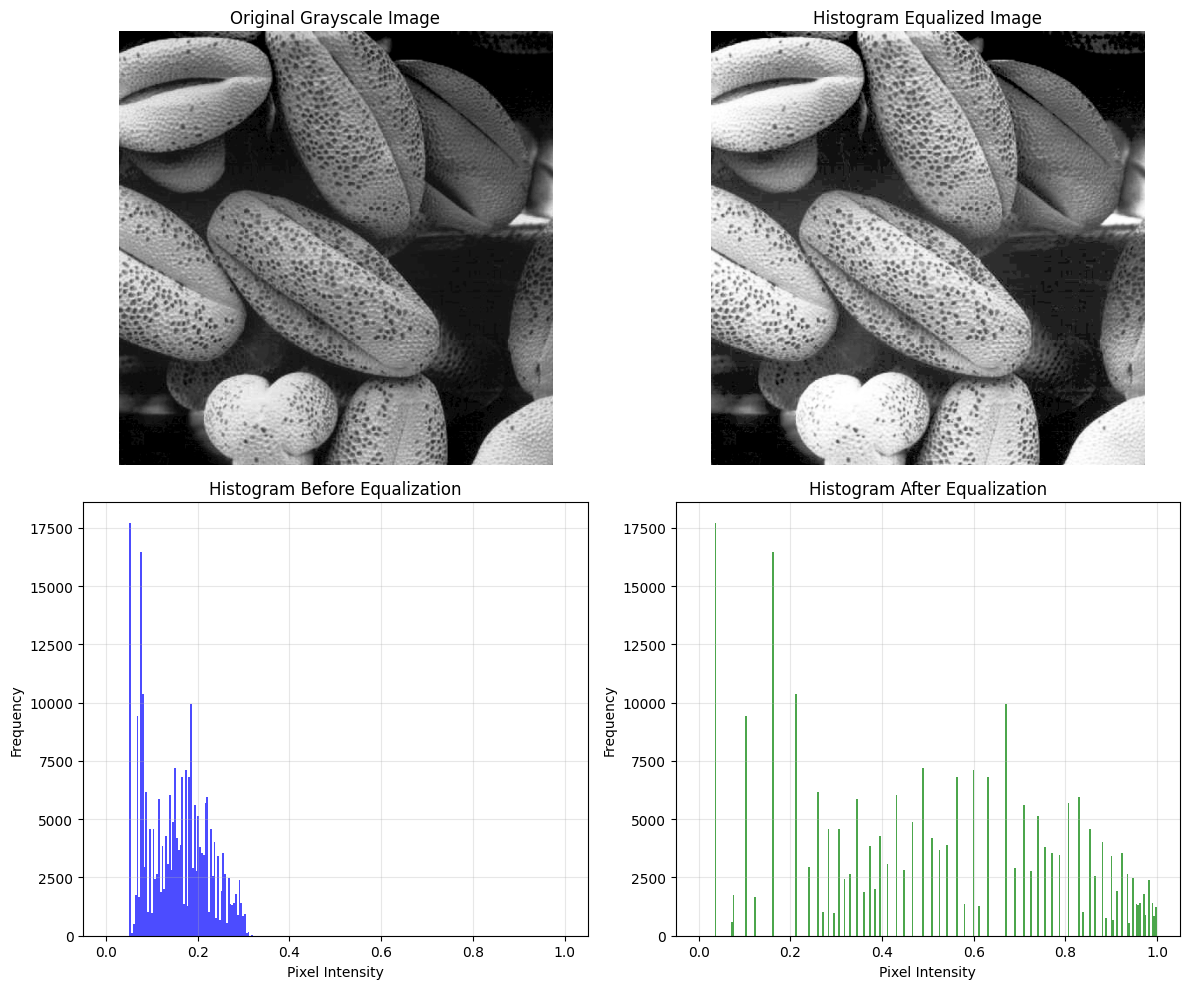

Original image range: 0.051 - 0.325
Equalized image range: 0.039 - 1.000


In [5]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, img_as_ubyte, img_as_float
from skimage.color import rgb2gray
from skimage import exposure

# Load the image (assuming Fig. 5 is 'spider.png')
image = io.imread('./a1images/a1images/shells.tif')
print(f"Image data type: {image.dtype}")
print(f"Image range: {image.min()} to {image.max()}")
# Convert to grayscale if it's RGB
if len(image.shape) == 3:
    image = rgb2gray(image)

# Convert to float in range [0, 1]
image = img_as_float(image)
image_display = exposure.rescale_intensity(image, out_range=(0, 255)).astype(np.uint8)

# Flatten the image to 1D for histogram processing
flat_img = image.ravel()

# Step 1: Compute histogram (256 bins for 8-bit intensity levels)
hist, bin_edges = np.histogram(flat_img, bins=256, range=(0, 1))

# Step 2: Compute Cumulative Distribution Function (CDF)
cdf = hist.cumsum()  # Cumulative sum
cdf_normalized = cdf / cdf.max()  # Normalize to [0, 1]

# Step 3: Map original pixel values to equalized values
# Scale CDF to [0, 255], then back to [0, 1]
bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2  # Center of each bin
equalized_values = np.interp(flat_img, bin_centers, cdf_normalized)

# Reshape back to original image shape
equalized_image = equalized_values.reshape(image.shape)

# --- Display Results ---
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# 1. Original Image
axes[0, 0].imshow(image_display, cmap='gray')
axes[0, 0].set_title('Original Grayscale Image')
axes[0, 0].axis('off')

# 2. Equalized Image
axes[0, 1].imshow(equalized_image, cmap='gray')
axes[0, 1].set_title('Histogram Equalized Image')
axes[0, 1].axis('off')

# 3. Histogram Before
axes[1, 0].hist(flat_img, bins=256, range=(0, 1), color='blue', alpha=0.7)
axes[1, 0].set_title('Histogram Before Equalization')
axes[1, 0].set_xlabel('Pixel Intensity')
axes[1, 0].set_ylabel('Frequency')
axes[1, 0].grid(True, alpha=0.3)

# 4. Histogram After
axes[1, 1].hist(equalized_image.ravel(), bins=256, range=(0, 1), color='green', alpha=0.7)
axes[1, 1].set_title('Histogram After Equalization')
axes[1, 1].set_xlabel('Pixel Intensity')
axes[1, 1].set_ylabel('Frequency')
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Optional: Print min/max to confirm range
print(f"Original image range: {image.min():.3f} - {image.max():.3f}")
print(f"Equalized image range: {equalized_image.min():.3f} - {equalized_image.max():.3f}")

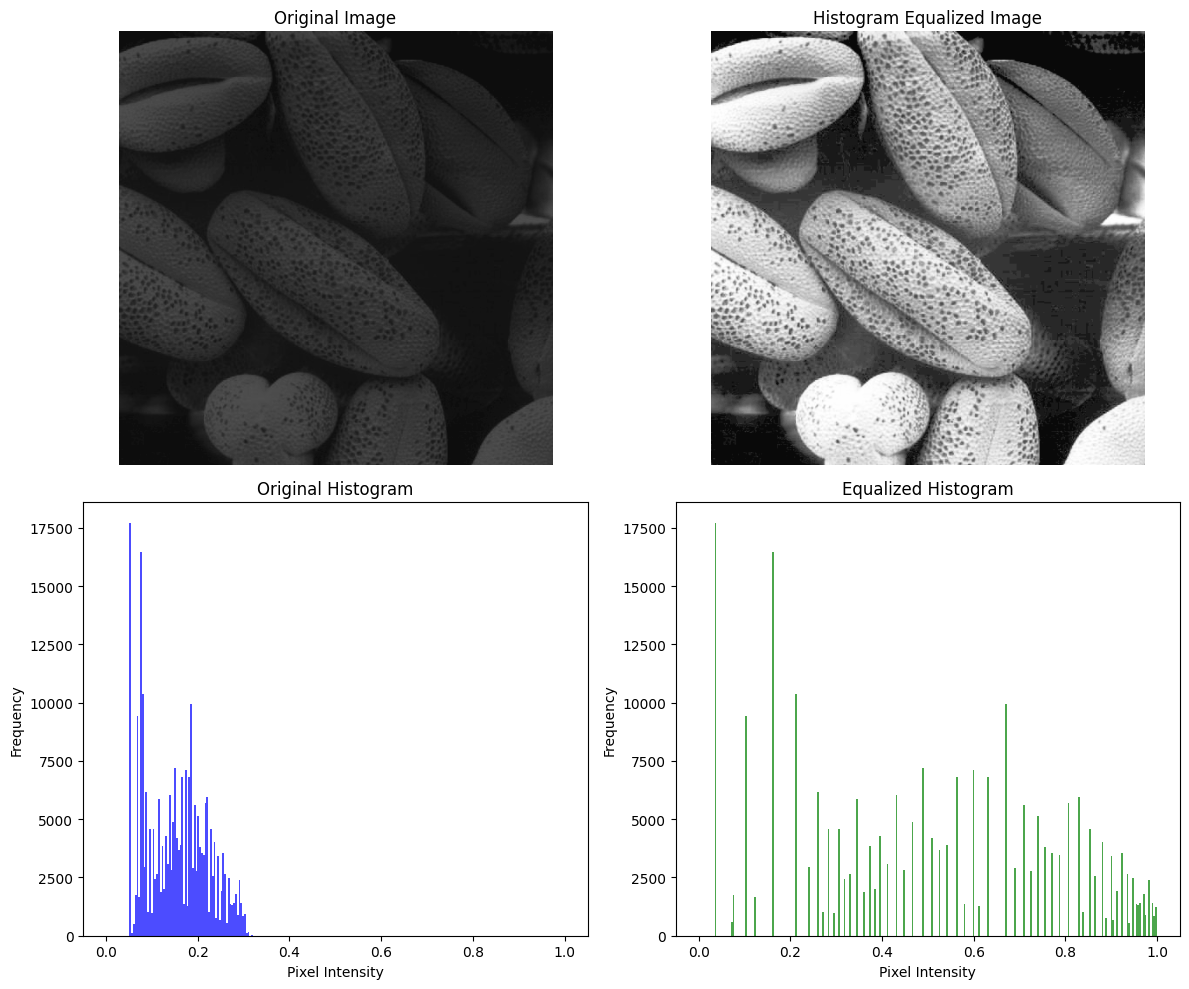

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, img_as_float
from skimage.color import rgb2gray
import os

def load_tiff_image(main_path, backup_paths=None):
    if os.path.exists(main_path):
        return io.imread(main_path)
    
    if backup_paths:
        for path in backup_paths:
            if os.path.exists(path):
                return io.imread(path)
    return None

def prepare_display_image(original_image):
    if original_image.dtype == np.uint16:
        display_image = (original_image.astype(np.float32) / 65535.0 * 255).astype(np.uint8)
    elif original_image.dtype == np.uint8:
        display_image = original_image.copy()
    else:
        min_val, max_val = original_image.min(), original_image.max()
        if max_val > 1.0:
            display_image = ((original_image - min_val) / (max_val - min_val) * 255).astype(np.uint8)
        else:
            display_image = (original_image * 255).astype(np.uint8)
    
    return display_image

main_path = './a1images/a1images/shells.tif'
backup_paths = ['./a1images/shells.tif', './shells.tif', 'shells.tif']

tiff_image = load_tiff_image(main_path, backup_paths)

if tiff_image is None:
    print("ERROR: Could not find image file!")
    exit()

if len(tiff_image.shape) == 3:
    grayscale_image = rgb2gray(tiff_image)
else:
    grayscale_image = tiff_image.copy()

original_display = prepare_display_image(grayscale_image)
normalized_image = img_as_float(grayscale_image)
flattened_pixels = normalized_image.ravel()

pixel_histogram, bin_edges = np.histogram(flattened_pixels, bins=256, range=(0, 1))
cumulative_distribution = pixel_histogram.cumsum()
normalized_cdf = cumulative_distribution / cumulative_distribution.max()

bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
equalized_pixels = np.interp(flattened_pixels, bin_centers, normalized_cdf)
equalized_image = equalized_pixels.reshape(normalized_image.shape)
equalized_display = (equalized_image * 255).astype(np.uint8)

fig, axes = plt.subplots(2, 2, figsize=(12, 10))

axes[0, 0].imshow(original_display, cmap='gray', vmin=0, vmax=255)
axes[0, 0].set_title('Original Image')
axes[0, 0].axis('off')

axes[0, 1].imshow(equalized_display, cmap='gray', vmin=0, vmax=255)
axes[0, 1].set_title('Histogram Equalized Image')
axes[0, 1].axis('off')

axes[1, 0].hist(flattened_pixels, bins=256, range=(0, 1), color='blue', alpha=0.7)
axes[1, 0].set_title('Original Histogram')
axes[1, 0].set_xlabel('Pixel Intensity')
axes[1, 0].set_ylabel('Frequency')

axes[1, 1].hist(equalized_image.ravel(), bins=256, range=(0, 1), color='green', alpha=0.7)
axes[1, 1].set_title('Equalized Histogram')
axes[1, 1].set_xlabel('Pixel Intensity')
axes[1, 1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

# Question - 06

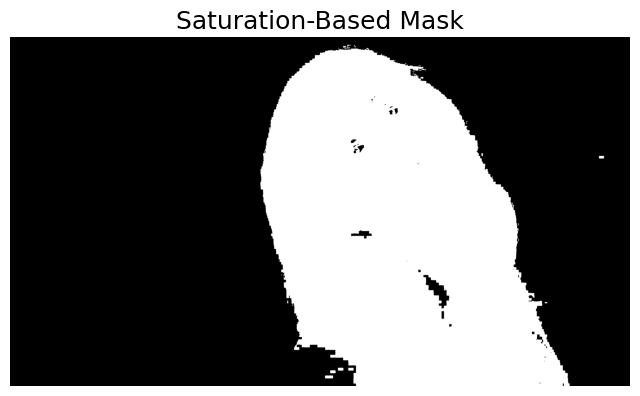

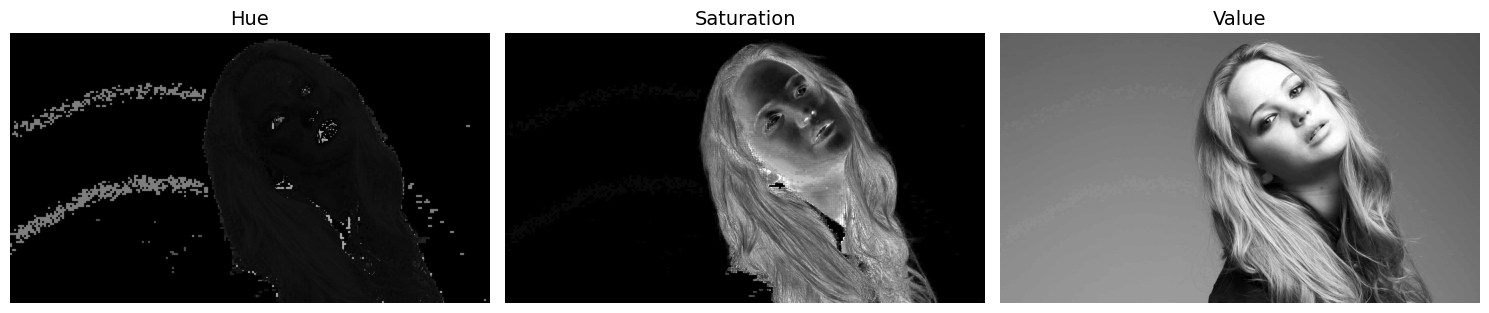

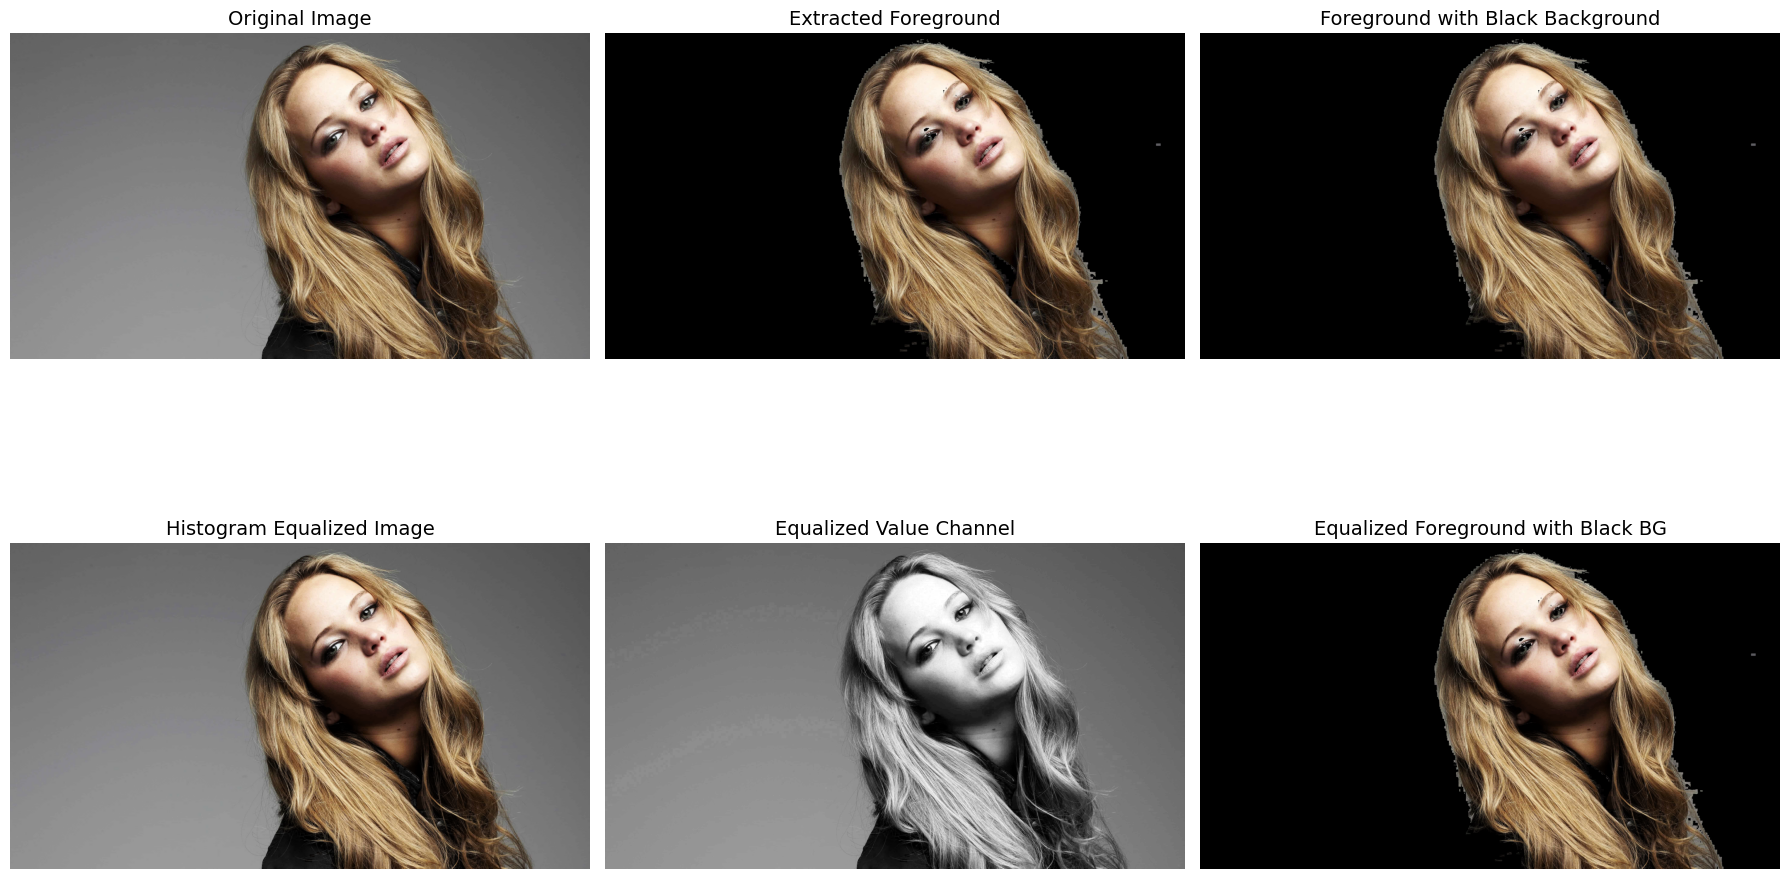

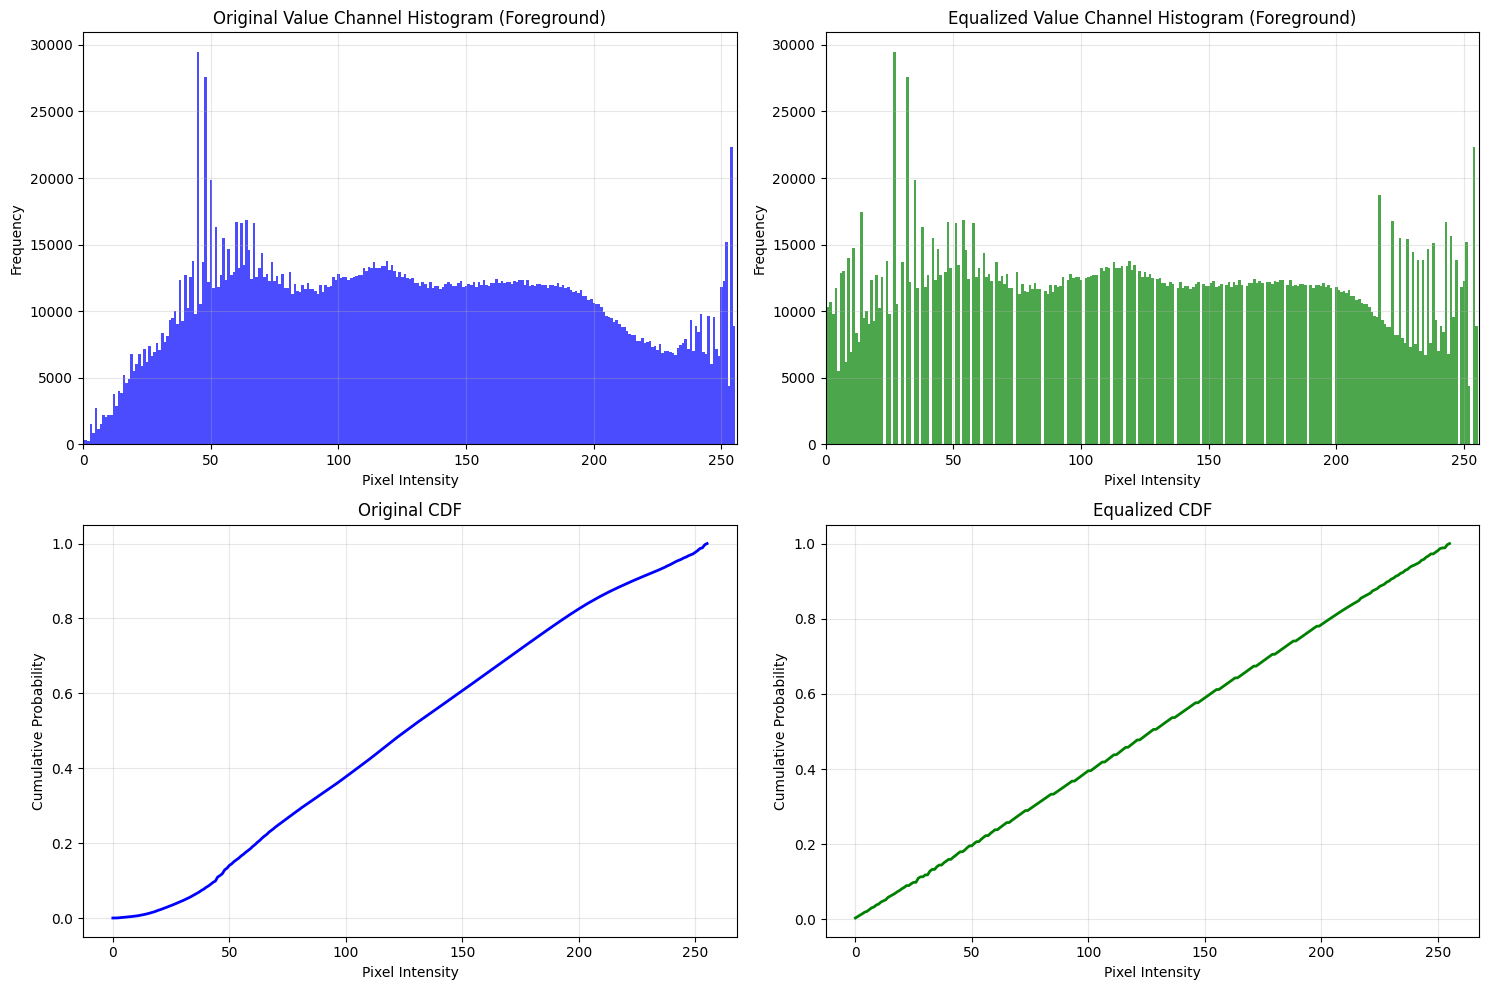

In [7]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import os

def histogram_equalize_with_mask(channel, mask):
    foreground_pixels = channel[mask > 0]
    if len(foreground_pixels) == 0:
        return channel, None, None
    hist = cv.calcHist([channel], [0], mask, [256], [0, 256])
    cdf = hist.cumsum()
    cdf_normalized = cdf * 255 / cdf[-1]
    lookup_table = cdf_normalized.astype(np.uint8)
    equalized_channel = channel.copy()
    equalized_channel[mask > 0] = lookup_table[foreground_pixels]
    return equalized_channel, hist, cdf

jennifer = cv.imread('./a1images/a1images/jeniffer.jpg')
jennifer_hsv = cv.cvtColor(jennifer, cv.COLOR_BGR2HSV)
H, S, V = cv.split(jennifer_hsv)

saturation_threshold = 12
_, mask = cv.threshold(S, saturation_threshold, 255, cv.THRESH_BINARY)

kernel = np.ones((3,3), np.uint8)
mask = cv.morphologyEx(mask, cv.MORPH_CLOSE, kernel)
mask = cv.morphologyEx(mask, cv.MORPH_OPEN, kernel)

foreground = cv.bitwise_and(jennifer, jennifer, mask=mask)

foreground_black_bg = jennifer.copy()
foreground_black_bg[mask == 0] = [0, 0, 0]

equalized_V, hist_original, cdf_original = histogram_equalize_with_mask(V, mask)

equalized_hsv = jennifer_hsv.copy()
equalized_hsv[:, :, 2] = equalized_V
equalized_image = cv.cvtColor(equalized_hsv, cv.COLOR_HSV2BGR)

equalized_foreground_black_bg = equalized_image.copy()
equalized_foreground_black_bg[mask == 0] = [0, 0, 0]

plt.figure(figsize=(8, 6))
plt.imshow(mask, cmap='gray')
plt.title('Saturation-Based Mask', fontsize=18)
plt.axis('off')
plt.show()

fig, ax = plt.subplots(1, 3, figsize=(15, 5))

ax[0].imshow(H, cmap='gray', vmin=0, vmax=255)
ax[0].set_title('Hue', fontsize=14)
ax[0].axis("off")

ax[1].imshow(S, cmap='gray', vmin=0, vmax=255)
ax[1].set_title('Saturation', fontsize=14)
ax[1].axis("off")

ax[2].imshow(V, cmap='gray', vmin=0, vmax=255)
ax[2].set_title('Value', fontsize=14)
ax[2].axis("off")

plt.tight_layout()
plt.show()

fig, axes = plt.subplots(2, 3, figsize=(18, 12))

axes[0, 0].imshow(cv.cvtColor(jennifer, cv.COLOR_BGR2RGB))
axes[0, 0].set_title('Original Image', fontsize=14)
axes[0, 0].axis('off')

axes[0, 1].imshow(cv.cvtColor(foreground, cv.COLOR_BGR2RGB))
axes[0, 1].set_title('Extracted Foreground', fontsize=14)
axes[0, 1].axis('off')

axes[0, 2].imshow(cv.cvtColor(foreground_black_bg, cv.COLOR_BGR2RGB))
axes[0, 2].set_title('Foreground with Black Background', fontsize=14)
axes[0, 2].axis('off')

axes[1, 0].imshow(cv.cvtColor(equalized_image, cv.COLOR_BGR2RGB))
axes[1, 0].set_title('Histogram Equalized Image', fontsize=14)
axes[1, 0].axis('off')

axes[1, 1].imshow(equalized_V, cmap='gray')
axes[1, 1].set_title('Equalized Value Channel', fontsize=14)
axes[1, 1].axis('off')

axes[1, 2].imshow(cv.cvtColor(equalized_foreground_black_bg, cv.COLOR_BGR2RGB))
axes[1, 2].set_title('Equalized Foreground with Black BG', fontsize=14)
axes[1, 2].axis('off')

plt.tight_layout()
plt.show()

foreground_hsv = cv.cvtColor(foreground, cv.COLOR_BGR2HSV)
H_fg, S_fg, V_fg = cv.split(foreground_hsv)

hist_original_fg = cv.calcHist([V_fg], [0], mask, [256], [0, 256])

equalized_V_fg = equalized_V.copy()
hist_equalized_fg = cv.calcHist([equalized_V_fg], [0], mask, [256], [0, 256])

fig, axes = plt.subplots(2, 2, figsize=(15, 10))

x_positions = np.arange(len(hist_original_fg))
axes[0, 0].bar(x_positions, hist_original_fg.flatten(), color='blue', width=1, alpha=0.7)
axes[0, 0].set_title('Original Value Channel Histogram (Foreground)', fontsize=12)
axes[0, 0].set_xlabel('Pixel Intensity')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].set_xlim([0, 256])
axes[0, 0].grid(True, alpha=0.3)

axes[0, 1].bar(x_positions, hist_equalized_fg.flatten(), color='green', width=1, alpha=0.7)
axes[0, 1].set_title('Equalized Value Channel Histogram (Foreground)', fontsize=12)
axes[0, 1].set_xlabel('Pixel Intensity')
axes[0, 1].set_ylabel('Frequency')
axes[0, 1].set_xlim([0, 256])
axes[0, 1].grid(True, alpha=0.3)

if cdf_original is not None:
    cdf_normalized = cdf_original / cdf_original[-1]
    axes[1, 0].plot(cdf_normalized.flatten(), color='blue', linewidth=2)
    axes[1, 0].set_title('Original CDF', fontsize=12)
    axes[1, 0].set_xlabel('Pixel Intensity')
    axes[1, 0].set_ylabel('Cumulative Probability')
    axes[1, 0].grid(True, alpha=0.3)

cdf_equalized = hist_equalized_fg.cumsum()
if len(cdf_equalized) > 0 and cdf_equalized[-1] > 0:
    cdf_eq_normalized = cdf_equalized / cdf_equalized[-1]
    axes[1, 1].plot(cdf_eq_normalized.flatten(), color='green', linewidth=2)
    axes[1, 1].set_title('Equalized CDF', fontsize=12)
    axes[1, 1].set_xlabel('Pixel Intensity') 
    axes[1, 1].set_ylabel('Cumulative Probability')
    axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Question - 07

Sobel Filter Implementation for Azure ML
Image shape: (380, 364)
Demonstrating Sobel filter separability:

Sobel X kernel:
[[-1  0  1]
 [-2  0  2]
 [-1  0  1]]

Decomposed as:
Vertical: [1 2 1]
Horizontal: [ 1  0 -1]
Product:
[[ 1  0 -1]
 [ 2  0 -2]
 [ 1  0 -1]]

Sobel Y kernel:
[[-1 -2 -1]
 [ 0  0  0]
 [ 1  2  1]]

Decomposed as:
Vertical: [ 1  0 -1]
Horizontal: [1 2 1]
Product:
[[ 1  2  1]
 [ 0  0  0]
 [-1 -2 -1]]

Applying Sobel filters using three different methods...

Mean absolute differences:
Method A vs B: 0.3644
Method A vs C: 0.0000
Method B vs C: 0.3644


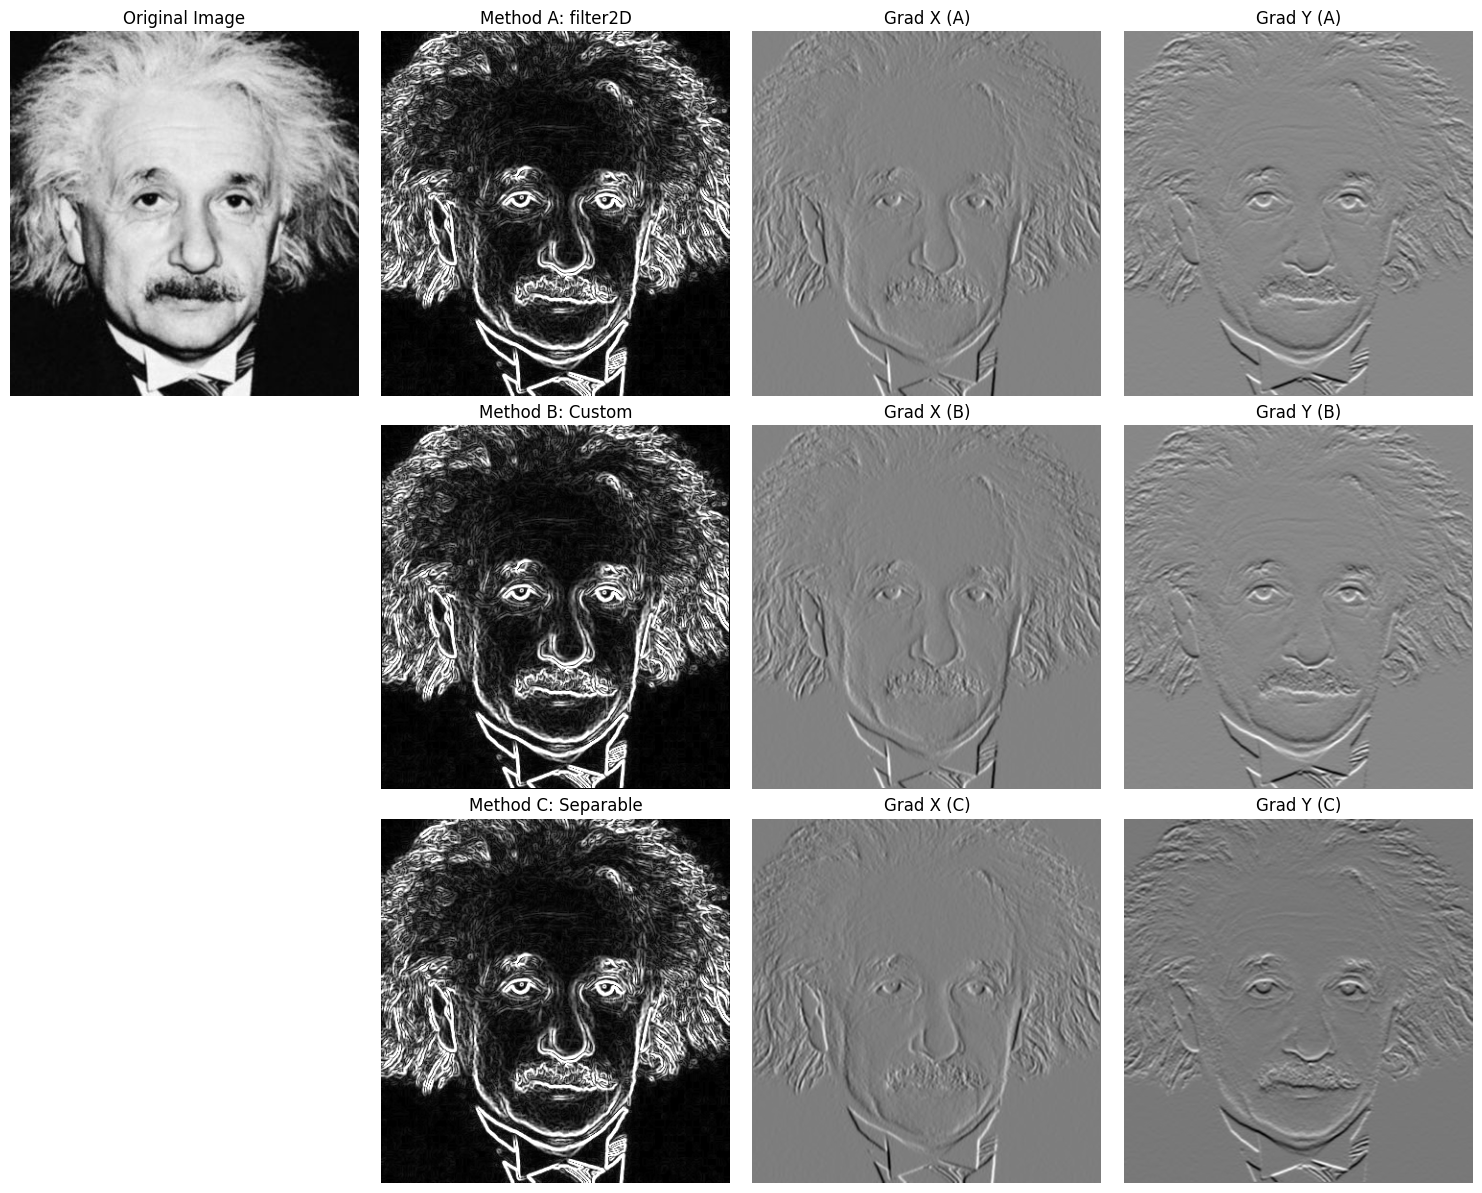


All methods completed successfully!
Results saved as 'sobel_comparison.png'


In [8]:
import numpy as np
import cv2
from scipy import ndimage
import matplotlib.pyplot as plt
from PIL import Image
import os

# Sample image loading function (adjust path as needed for Azure ML)
def load_sample_image():
    """Load a sample image or create one if none available"""
    try:
        # Try to load an image from your Azure ML dataset
        # Replace 'path_to_your_image.jpg' with actual path
        img = cv2.imread('./a1images/a1images/einstein.png', cv2.IMREAD_GRAYSCALE)
        if img is None:
            raise FileNotFoundError("Image not found")
        return img
    except:
        # Create a sample image for demonstration
        print("Creating sample image for demonstration")
        img = np.zeros((100, 100), dtype=np.uint8)
        cv2.rectangle(img, (20, 20), (80, 80), 255, -1)
        cv2.circle(img, (50, 50), 15, 0, -1)
        return img

def sobel_filter_method_a(image):
    """
    (a) Using existing filter2D to Sobel filter the image
    """
    # Define Sobel kernels
    sobel_x = np.array([[-1, 0, 1],
                       [-2, 0, 2],
                       [-1, 0, 1]], dtype=np.float32)
    
    sobel_y = np.array([[-1, -2, -1],
                       [ 0,  0,  0],
                       [ 1,  2,  1]], dtype=np.float32)
    
    # Apply Sobel filters using filter2D
    grad_x = cv2.filter2D(image, cv2.CV_32F, sobel_x)
    grad_y = cv2.filter2D(image, cv2.CV_32F, sobel_y)
    
    # Compute magnitude
    magnitude = np.sqrt(grad_x**2 + grad_y**2)
    magnitude = np.clip(magnitude, 0, 255).astype(np.uint8)
    
    return magnitude, grad_x, grad_y

def sobel_filter_method_b(image):
    """
    (b) Write your own code to Sobel filter the image
    """
    # Define Sobel kernels
    sobel_x = np.array([[-1, 0, 1],
                       [-2, 0, 2],
                       [-1, 0, 1]], dtype=np.float32)
    
    sobel_y = np.array([[-1, -2, -1],
                       [ 0,  0,  0],
                       [ 1,  2,  1]], dtype=np.float32)
    
    # Get image dimensions
    rows, cols = image.shape
    
    # Initialize output arrays
    grad_x = np.zeros((rows, cols), dtype=np.float32)
    grad_y = np.zeros((rows, cols), dtype=np.float32)
    
    # Convert image to float for calculations
    img_float = image.astype(np.float32)
    
    # Apply convolution manually (avoiding borders for simplicity)
    for i in range(1, rows-1):
        for j in range(1, cols-1):
            # Extract 3x3 neighborhood
            neighborhood = img_float[i-1:i+2, j-1:j+2]
            
            # Apply Sobel X kernel
            grad_x[i, j] = np.sum(neighborhood * sobel_x)
            
            # Apply Sobel Y kernel
            grad_y[i, j] = np.sum(neighborhood * sobel_y)
    
    # Compute magnitude
    magnitude = np.sqrt(grad_x**2 + grad_y**2)
    magnitude = np.clip(magnitude, 0, 255).astype(np.uint8)
    
    return magnitude, grad_x, grad_y

def sobel_filter_method_c(image):
    """
    (c) Using the separability property to implement Sobel filtering
    The Sobel operator can be decomposed as:
    Sobel_x = [1, 2, 1]^T * [1, 0, -1]
    Sobel_y = [1, 0, -1]^T * [1, 2, 1]
    """
    # Define separable kernels
    # For Sobel X: vertical [1, 2, 1] then horizontal [1, 0, -1]
    vertical_smooth = np.array([[1], [2], [1]], dtype=np.float32)
    horizontal_diff = np.array([[1, 0, -1]], dtype=np.float32)
    
    # For Sobel Y: vertical [1, 0, -1] then horizontal [1, 2, 1]
    vertical_diff = np.array([[1], [0], [-1]], dtype=np.float32)
    horizontal_smooth = np.array([[1, 2, 1]], dtype=np.float32)
    
    # Convert image to float
    img_float = image.astype(np.float32)
    
    # Sobel X using separable filters
    temp_x = cv2.filter2D(img_float, cv2.CV_32F, vertical_smooth)
    grad_x = cv2.filter2D(temp_x, cv2.CV_32F, horizontal_diff)
    
    # Sobel Y using separable filters
    temp_y = cv2.filter2D(img_float, cv2.CV_32F, vertical_diff)
    grad_y = cv2.filter2D(temp_y, cv2.CV_32F, horizontal_smooth)
    
    # Compute magnitude
    magnitude = np.sqrt(grad_x**2 + grad_y**2)
    magnitude = np.clip(magnitude, 0, 255).astype(np.uint8)
    
    return magnitude, grad_x, grad_y

def demonstrate_separability_property():
    """
    Demonstrate the separability property mathematically
    """
    print("Demonstrating Sobel filter separability:")
    print("\nSobel X kernel:")
    sobel_x = np.array([[-1, 0, 1],
                       [-2, 0, 2],
                       [-1, 0, 1]])
    print(sobel_x)
    
    print("\nDecomposed as:")
    v1 = np.array([[1], [2], [1]])
    h1 = np.array([[1, 0, -1]])
    print(f"Vertical: {v1.flatten()}")
    print(f"Horizontal: {h1.flatten()}")
    print(f"Product:\n{v1 @ h1}")
    
    print("\nSobel Y kernel:")
    sobel_y = np.array([[-1, -2, -1],
                       [ 0,  0,  0],
                       [ 1,  2,  1]])
    print(sobel_y)
    
    print("\nDecomposed as:")
    v2 = np.array([[1], [0], [-1]])
    h2 = np.array([[1, 2, 1]])
    print(f"Vertical: {v2.flatten()}")
    print(f"Horizontal: {h2.flatten()}")
    print(f"Product:\n{v2 @ h2}")

def compare_methods(image):
    """
    Compare all three methods and display results
    """
    print("Applying Sobel filters using three different methods...")
    
    # Method A: Using filter2D
    mag_a, gx_a, gy_a = sobel_filter_method_a(image)
    
    # Method B: Custom implementation
    mag_b, gx_b, gy_b = sobel_filter_method_b(image)
    
    # Method C: Using separability property
    mag_c, gx_c, gy_c = sobel_filter_method_c(image)
    
    # Compare results (they should be very similar)
    diff_ab = np.mean(np.abs(mag_a.astype(np.float32) - mag_b.astype(np.float32)))
    diff_ac = np.mean(np.abs(mag_a.astype(np.float32) - mag_c.astype(np.float32)))
    diff_bc = np.mean(np.abs(mag_b.astype(np.float32) - mag_c.astype(np.float32)))
    
    print(f"\nMean absolute differences:")
    print(f"Method A vs B: {diff_ab:.4f}")
    print(f"Method A vs C: {diff_ac:.4f}")
    print(f"Method B vs C: {diff_bc:.4f}")
    
    # Create visualization
    plt.figure(figsize=(15, 12))
    
    # Original image
    plt.subplot(3, 4, 1)
    plt.imshow(image, cmap='gray')
    plt.title('Original Image')
    plt.axis('off')
    
    # Method A results
    plt.subplot(3, 4, 2)
    plt.imshow(mag_a, cmap='gray')
    plt.title('Method A: filter2D')
    plt.axis('off')
    
    plt.subplot(3, 4, 3)
    plt.imshow(gx_a, cmap='gray')
    plt.title('Grad X (A)')
    plt.axis('off')
    
    plt.subplot(3, 4, 4)
    plt.imshow(gy_a, cmap='gray')
    plt.title('Grad Y (A)')
    plt.axis('off')
    
    # Method B results
    plt.subplot(3, 4, 6)
    plt.imshow(mag_b, cmap='gray')
    plt.title('Method B: Custom')
    plt.axis('off')
    
    plt.subplot(3, 4, 7)
    plt.imshow(gx_b, cmap='gray')
    plt.title('Grad X (B)')
    plt.axis('off')
    
    plt.subplot(3, 4, 8)
    plt.imshow(gy_b, cmap='gray')
    plt.title('Grad Y (B)')
    plt.axis('off')
    
    # Method C results
    plt.subplot(3, 4, 10)
    plt.imshow(mag_c, cmap='gray')
    plt.title('Method C: Separable')
    plt.axis('off')
    
    plt.subplot(3, 4, 11)
    plt.imshow(gx_c, cmap='gray')
    plt.title('Grad X (C)')
    plt.axis('off')
    
    plt.subplot(3, 4, 12)
    plt.imshow(gy_c, cmap='gray')
    plt.title('Grad Y (C)')
    plt.axis('off')
    
    plt.tight_layout()
    
    # Save the plot for Azure ML
    plt.savefig('sobel_comparison.png', dpi=300, bbox_inches='tight')
    plt.show()
    
    return mag_a, mag_b, mag_c

def main():
    """
    Main function to run all Sobel filter implementations
    """
    print("Sobel Filter Implementation for Azure ML")
    print("=" * 50)
    
    # Load image
    image = load_sample_image()
    print(f"Image shape: {image.shape}")
    
    # Demonstrate separability property
    demonstrate_separability_property()
    print("\n" + "=" * 50)
    
    # Compare all methods
    results = compare_methods(image)
    
    print("\nAll methods completed successfully!")
    print("Results saved as 'sobel_comparison.png'")

if __name__ == "__main__":
    main()

# Additional utility functions for Azure ML integration

def save_results_for_azure_ml(magnitude_image, output_path="sobel_output"):
    """
    Save results in format suitable for Azure ML outputs
    """
    os.makedirs(output_path, exist_ok=True)
    cv2.imwrite(os.path.join(output_path, "sobel_magnitude.png"), magnitude_image)
    print(f"Results saved to {output_path}")

def process_batch_images(image_folder, output_folder):
    """
    Process multiple images in batch (useful for Azure ML datasets)
    """
    os.makedirs(output_folder, exist_ok=True)
    
    for filename in os.listdir(image_folder):
        if filename.lower().endswith(('.png', '.jpg', '.jpeg')):
            # Load image
            img_path = os.path.join(image_folder, filename)
            image = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
            
            if image is not None:
                # Apply Sobel filter (using method A as default)
                magnitude, _, _ = sobel_filter_method_a(image)
                
                # Save result
                output_path = os.path.join(output_folder, f"sobel_{filename}")
                cv2.imwrite(output_path, magnitude)
                print(f"Processed: {filename}")